In [1]:
import seaborn as sns

In [2]:
iris=sns.load_dataset('iris')

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


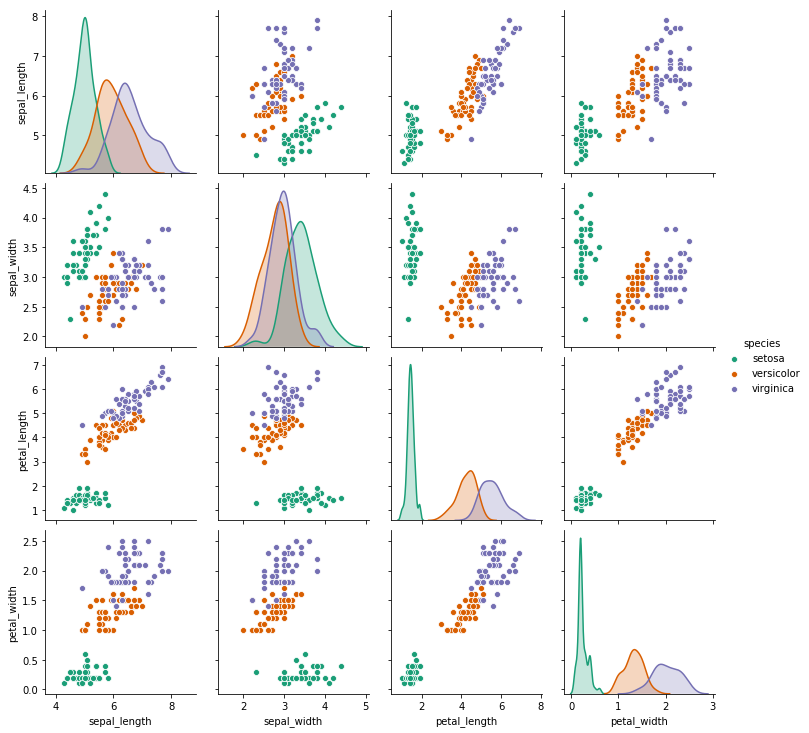

In [6]:
sns.pairplot(iris,hue='species',palette='Dark2')

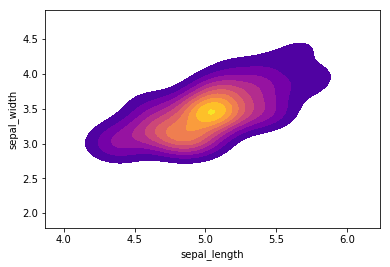

In [7]:
setosa=iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_length'],setosa['sepal_width'],cmap='plasma',shade=True,shade_lowest=False)

In [11]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [13]:
from sklearn.svm import SVC

In [14]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
predictions=svc_model.predict(X_test)

In [22]:
svc_model.score(X_test,y_test)

0.9555555555555556

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [44]:
cm_prediction=confusion_matrix(y_test,predictions)
cm_prediction

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 14]], dtype=int64)

Text(69,0.5,'Truth')

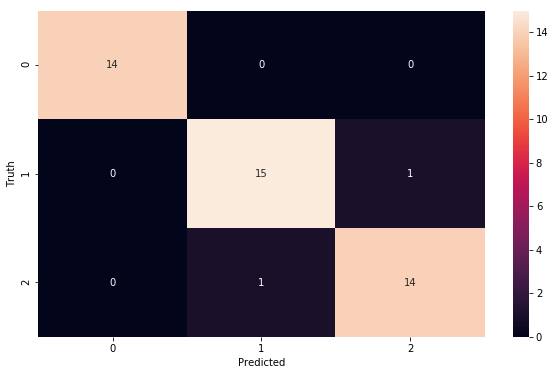

In [48]:
plt.figure(figsize = (10,6))
sns.heatmap(cm_prediction,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        16
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [40]:
print(accuracy_score(y_test,predictions))

0.9555555555555556


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier(n_estimators=200)

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rfc_pred=rfc.predict(X_test)

In [50]:
rfc_cm=confusion_matrix(y_test,rfc_pred)
rfc_cm

array([[14,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 14]], dtype=int64)

Text(69,0.5,'Truth')

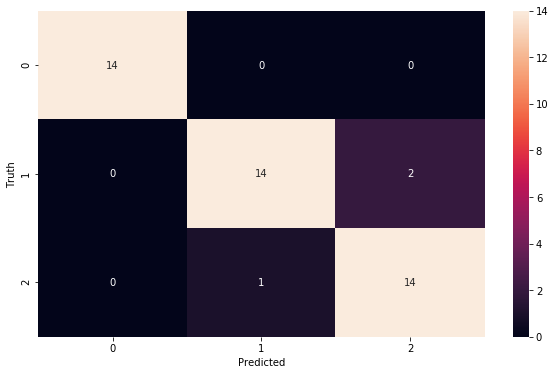

In [51]:
plt.figure(figsize = (10,6))
sns.heatmap(rfc_cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
print(accuracy_score(y_test,rfc_pred))

0.9333333333333333


In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.88      0.90        16
   virginica       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

